In [ ]:
import tensorflow_datasets as tfds
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import json
from google.colab import drive

In [ ]:
drive.mount("/content/drive/")
os.listdir("drive/MyDrive/Colab Notebooks/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


['test.ipynb',
 'mnist.ipynb',
 'face_recorded_files',
 'models',
 'pgu_face_training.ipynb',
 'pgu_face_training.ipynb의 사본',
 'mnist_training.ipynb']

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


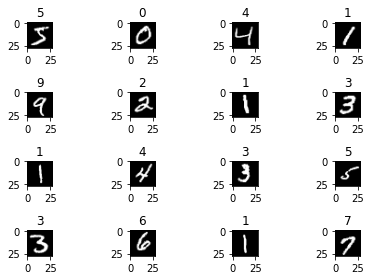

In [ ]:
rows = 4
cols = 4
axes=[]
fig=plt.figure()

for a in range(rows*cols):
    axes.append(fig.add_subplot(rows, cols, a+1))
    subplot_title=(y_train[a])
    axes[-1].set_title(subplot_title)
    plt.imshow(x_train[a], cmap="gray")
fig.tight_layout()
plt.show()

# 일반적인 DNN

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(units=128, activation="relu"))
model.add(tf.keras.layers.Dense(units=128, activation="relu"))
model.add(tf.keras.layers.Dense(units=128, activation="relu"))
model.add(tf.keras.layers.Dense(units=10, activation="softmax"))

model.compile(
    optimizer=tf.keras.optimizers.Adam(), 
    loss="sparse_categorical_crossentropy", 
    metrics=["accuracy"]
)

#계층, 차원, 파라미터 수 요약 확인
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0
_________________________________________________________________


Epoch 1/50
1407/1407 [==============================] - 8s 4ms/step - loss: 2.6128 - accuracy: 0.7815 - val_loss: 0.3180 - val_accuracy: 0.9155
Epoch 2/50
1407/1407 [==============================] - 5s 3ms/step - loss: 0.2398 - accuracy: 0.9330 - val_loss: 0.2627 - val_accuracy: 0.9326
Epoch 3/50
1407/1407 [==============================] - 5s 3ms/step - loss: 0.1946 - accuracy: 0.9432 - val_loss: 0.2016 - val_accuracy: 0.9459
Epoch 4/50
1407/1407 [==============================] - 5s 3ms/step - loss: 0.1549 - accuracy: 0.9548 - val_loss: 0.1817 - val_accuracy: 0.9485
Epoch 5/50
1407/1407 [==============================] - 5s 3ms/step - loss: 0.1250 - accuracy: 0.9634 - val_loss: 0.1687 - val_accuracy: 0.9543
Epoch 6/50
1407/1407 [==============================] - 5s 3ms/step - loss: 0.1119 - accuracy: 0.9665 - val_loss: 0.1722 - val_accuracy: 0.9543
Epoch 7/50
1407/1407 [==============================] - 5s 4ms/step - loss: 0.1052 - accuracy: 0.9695 - val_loss: 0.2091 - val_accuracy:

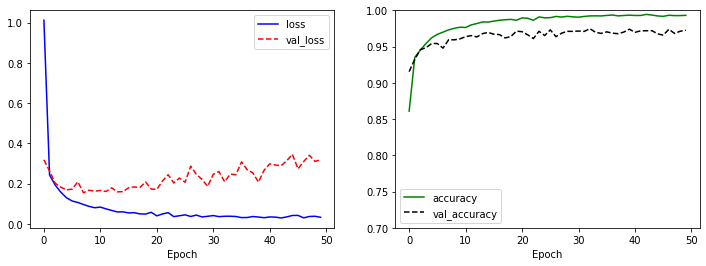

In [ ]:
# GPU 메모리 문제 발생 예방
config = tf.compat.v1.ConfigProto(allow_soft_placement=True)
config.gpu_options.per_process_gpu_memory_fraction = 0.8
tf.compat.v1.keras.backend.set_session(tf.compat.v1.Session(config=config))

epoch_counts = 50
history = model.fit(
    x_train,
    y_train,
    epochs=epoch_counts,
    # batch_size = batch_size,
    validation_split=0.25
    # callbacks=[early_stopping]
)

#train loss, validation loss 그래프 출력
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], "b-", label="loss")
plt.plot(history.history["val_loss"], "r--", label="val_loss")
plt.xlabel("Epoch")
plt.legend()

#train accutacy, validation accuracy 그래프 출력
plt.subplot(1, 2, 2)
plt.plot(history.history["accuracy"], "g-", label="accuracy")
plt.plot(history.history["val_accuracy"], "k--", label="val_accuracy")
plt.xlabel("Epoch")
plt.ylim(0.7, 1)
plt.legend()
plt.show()

In [ ]:
print("최종 결과 : ", model.evaluate(x_test, y_test))

class_name_dic_by_no = {
    "0":"0",
    "1":"1",
    "2":"2",
    "3":"3",
    "4":"4",
    "5":"5",
    "6":"6",
    "7":"7",
    "8":"8",
    "9":"9"
}

#모델 저장
try:
  pgu_face_model_dir = "drive/MyDrive/Colab Notebooks/models/mnist_model"
  json_string = model.to_json()
  open(pgu_face_model_dir + "/pgu_mnist_model_dnn_json.json", "w").write(json_string)
  model.save_weights(pgu_face_model_dir + "/pgu_mnist_model_dnn_weights.h5", overwrite=True)
  with open(pgu_face_model_dir + "/pgu_mnist_model_dnn_names.json", "w") as outfile:
      json.dump(class_name_dic_by_no, outfile)
except:
  print("=================================")
  print("=================================")
  print("모델 저장 중 오류가 발생하였습니다!")
  print("=================================")
  print("=================================")
finally:
  pass

313/313 [==============================] - 1s 2ms/step - loss: 0.2810 - accuracy: 0.9747
최종 결과 :  [0.28095483779907227, 0.9746999740600586]
